In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()

In [2]:
df = pd.read_csv("D:\work\Python\codes\Python Assignment 1_BI\playstore-analysis.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


# 1 Data cleanup
a-->Drop records where rating is missing since rating is our target/study variable

In [6]:
print(f"Missing Values :\n{df.isnull().sum()}")

Missing Values :
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [7]:
df = df.dropna(subset=['Rating'])

b-->Check the null values for the Android Ver column.

In [8]:
print(f"Missing Values :\n{df['Android Ver'].isnull().sum()}")

Missing Values :
3


In [9]:
print (df[df.isna().any(axis=1)])

                                           App            Category  Rating  \
15             Learn To Draw Kawaii Characters      ART_AND_DESIGN     3.2   
1553                      Market Update Helper  LIBRARIES_AND_DEMO     4.1   
4453                    [substratum] Vacuum: P     PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]     PERSONALIZATION     4.5   
6322                    Virtual DJ Sound Mixer               TOOLS     4.2   
7333                               Dots puzzle              FAMILY     4.0   
10472  Life Made WI-Fi Touchscreen Photo Frame                 1.9    19.0   

      Reviews          Size    Installs  Type     Price Content Rating  \
15         55   2700.000000      5,000+  Free         0       Everyone   
1553    20145     11.000000  1,000,000+  Free         0       Everyone   
4453      230  11000.000000      1,000+  Paid     $1.49       Everyone   
4490      189   2100.000000     10,000+  Free         0       Everyone   
6322 

In [10]:
df = df.drop(10472)
# Verification
verify = df[df["App"]=='Life Made WI-Fi Touchscreen Photo Frame']
print (verify)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [11]:
import statistics
Android_list = df['Android Ver'].to_list()
# print(Android_list)
# O/P ['4.2 and up', '1.5 and up', nan, nan, '4.0 and up', '4.0 and up']

# Did Manual work(illegal)
Al=[4.2,1.5,4.0,4.0]
# print(Al)
# print(statistics.mode(Al))
df_new = df.fillna(statistics.mode(Al))

print(df_new.loc[[4453]])
print('--------------------------------------------------------------------')
print(df_new.loc[[4490]])

                         App         Category  Rating Reviews     Size  \
4453  [substratum] Vacuum: P  PERSONALIZATION     4.4     230  11000.0   

     Installs  Type  Price Content Rating           Genres   Last Updated  \
4453   1,000+  Paid  $1.49       Everyone  Personalization  July 20, 2018   

     Current Ver Android Ver  
4453         4.4         4.0  
--------------------------------------------------------------------
                       App         Category  Rating Reviews    Size Installs  \
4490  Pi Dark [substratum]  PERSONALIZATION     4.5     189  2100.0  10,000+   

      Type Price Content Rating           Genres    Last Updated Current Ver  \
4490  Free     0       Everyone  Personalization  March 27, 2018         1.1   

     Android Ver  
4490         4.0  


In [12]:
print(f"Missing Values :{df_new['Current Ver'].isnull().sum()}")

Missing Values :0


# 2. Data clean up – correcting the data types¶
a. Which all variables need to be brought to numeric types?

In [13]:
df_new['Reviews'] = df_new['Reviews'].astype(int)
df_new['Size'] = df_new['Size'].astype(int)
# Additional conversion
df_new['Last Updated'] = df_new['Last Updated'].astype('datetime64[ns]')

b. Price variable – remove $ sign and convert to float

In [14]:
df_new['Price'] = df_new['Price'].str.replace('$', '')

C:\Users\veronica\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [15]:
df_new.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [16]:
df_new['Price'] = df_new['Price'].astype(float)

In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int32         
 4   Size            9366 non-null   int32         
 5   Installs        9366 non-null   object        
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(8)
memory usage: 1.2+ MB


c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [18]:
df_new['Installs'] = df_new['Installs'].str.replace('+','')

C:\Users\veronica\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [19]:
df_new['Installs'] = df_new['Installs'].str.replace(',', '')

In [20]:
df_new['Installs'] = df_new['Installs'].astype(int)

In [21]:
df_new.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [22]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int32         
 4   Size            9366 non-null   int32         
 5   Installs        9366 non-null   int32         
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(3), object(7)
memory usage: 1.1+ MB


# 3. Sanity checks – check for the following and handle accordingly

a. Avg. rating should be between 1 and 5, as only these values are allowed on the play
store.
i. Are there any such records? Drop if so.

In [23]:
pd.unique(df[['Rating']].values.ravel())

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

Avg. rating values is in between 1 and 5

b. Reviews should not be more than installs as only those who installed can review the app.

In [24]:
df = pd.DataFrame()
df = df_new[df_new.Reviews <= df_new.Installs]
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up


In [25]:
df.shape

(9359, 13)

# 4. Identify and handle outliers
a. Price column

i. Make suitable plot to identify outliers in price

C:\Users\veronica\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


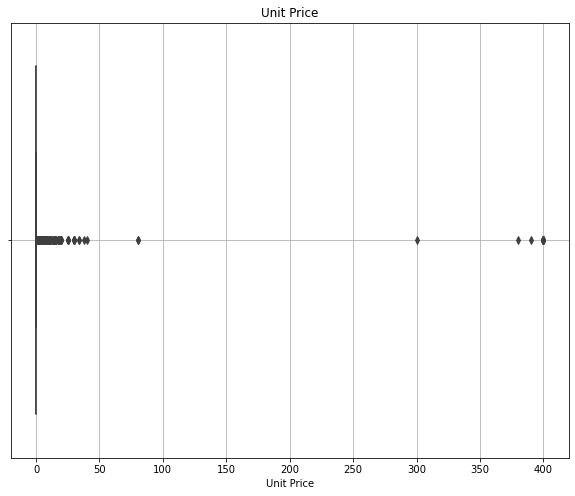

In [26]:
plt.subplots(figsize=(10,8))
sns.boxplot(df.Price)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid(linestyle='-')
plt.show()

ii. Do you expect apps on the play store to cost $200? Check out these cases

In [27]:
rslt_df = df_new[df_new['Price'] >= 200]
print(rslt_df)
# old data analysis (before data cleanning)
# rslt_df = data[data['Price'] == '$200.00']
# print(rslt_df)

                                 App   Category  Rating  Reviews   Size  \
4197          most expensive app (H)     FAMILY     4.3        6   1500   
4362                      💎 I'm rich  LIFESTYLE     3.8      718  26000   
4367        I'm Rich - Trump Edition  LIFESTYLE     3.6      275   7300   
5351                       I am rich  LIFESTYLE     3.8     3547   1800   
5354                  I am Rich Plus     FAMILY     4.0      856   8700   
5355                   I am rich VIP  LIFESTYLE     3.8      411   2600   
5356               I Am Rich Premium    FINANCE     4.1     1867   4700   
5357             I am extremely Rich  LIFESTYLE     2.9       41   2900   
5358                      I am Rich!    FINANCE     3.8       93  22000   
5359              I am rich(premium)    FINANCE     3.5      472    965   
5362                   I Am Rich Pro     FAMILY     4.4      201   2700   
5364  I am rich (Most expensive app)    FINANCE     4.1      129   2700   
5366                     

In [28]:
df = df.drop(4197)
df = df.drop(4362)
df = df.drop(4367)
df = df.drop(5351)
df = df.drop(5354)
df = df.drop(5355)
df = df.drop(5356)
df = df.drop(5357)
df = df.drop(5358)
df = df.drop(5359)
df = df.drop(5362)
df = df.drop(5364)
df = df.drop(5366)
df = df.drop(5369)
df = df.drop(5373)

iii. After dropping the useless records, make the suitable plot again to identify
outliers

C:\Users\veronica\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


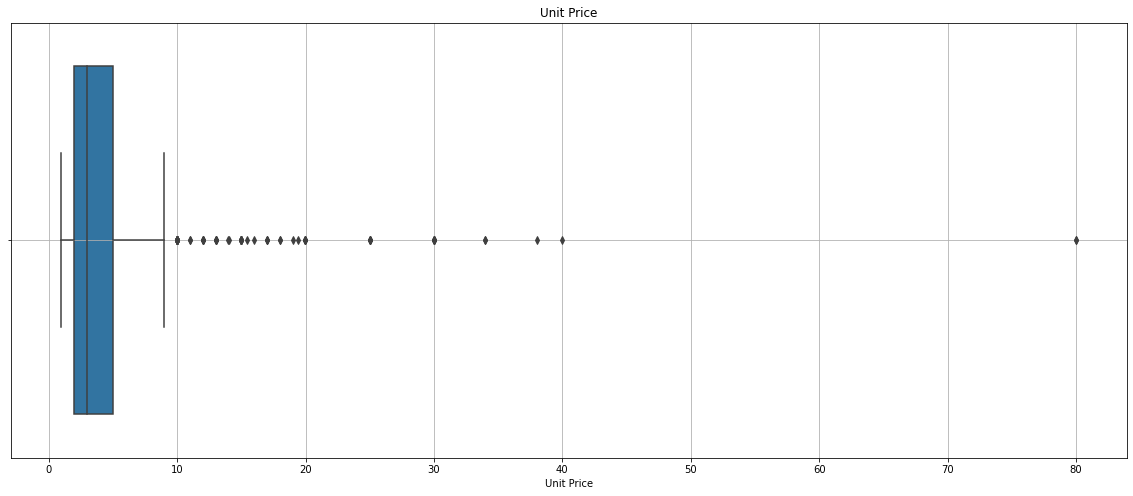

In [29]:
usful_df = df[df['Price'] != 0]
# usful_df
plt.subplots(figsize=(20,8))
sns.boxplot(usful_df.Price)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid()
plt.show()

iv. Limit data to records with price < $30

In [30]:
limit_data = df [df['Price']<30]
limit_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [31]:
limit_data.shape

(9338, 13)

b. Reviews column

i. Make suitable plot

Category
GAME                   1585419555
COMMUNICATION           815461799
SOCIAL                  621241071
FAMILY                  410221801
TOOLS                   273182982
PHOTOGRAPHY             213516607
SHOPPING                115041033
PRODUCTIVITY            114116717
VIDEO_PLAYERS           110379692
PERSONALIZATION          89345815
SPORTS                   70779551
TRAVEL_AND_LOCAL         62617772
ENTERTAINMENT            59178154
NEWS_AND_MAGAZINES       54399899
EDUCATION                39595010
HEALTH_AND_FITNESS       37893622
MAPS_AND_NAVIGATION      30659060
BOOKS_AND_REFERENCE      21958660
FINANCE                  17547629
WEATHER                  14604695
BUSINESS                 13954086
LIFESTYLE                12866528
FOOD_AND_DRINK            8883009
DATING                    7291039
HOUSE_AND_HOME            3976004
COMICS                    3350614
ART_AND_DESIGN            1714372
MEDICAL                   1585618
AUTO_AND_VEHICLES         1163630
LIBRA

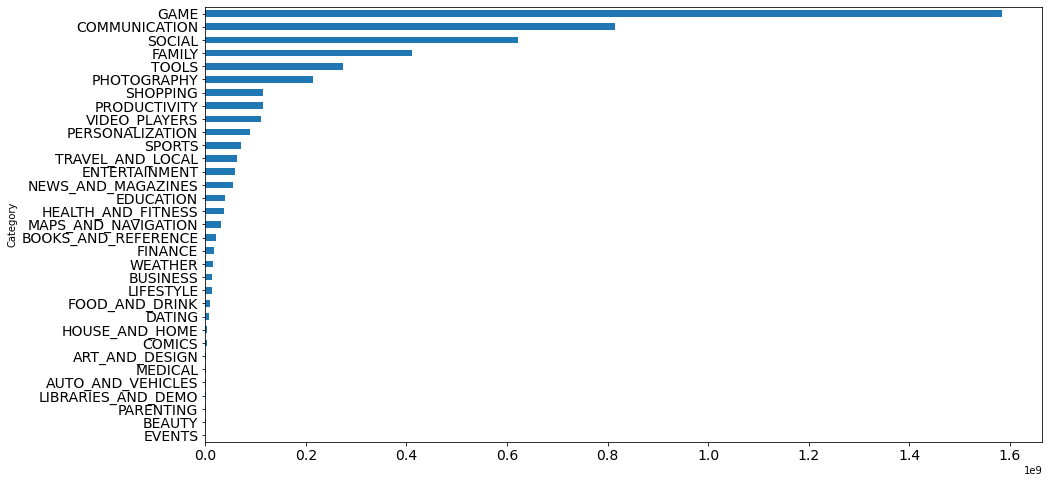

In [54]:
total=df.groupby('Category')['Reviews'].sum().sort_values()
plt.subplots(figsize=(15,8))
total.plot(kind='barh', fontsize=14)
print(total.sort_values(ascending=False))
plt.show()

ii. Limit data to apps with < 1 Million reviews

In [33]:
limit_data_by_review = df[df['Reviews'] < 1000000]
limit_data_by_review.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [34]:
limit_data_by_review.shape

(8640, 13)

c. Installs

i. What is the 95th percentile of the installs?

In [35]:
val = df.Installs.quantile(0.95) # 95th percentile
print(val)

100000000.0


In [36]:
# Verification
x = df.Installs.quantile(0.7) > val
print (x)

False


# 5. Data analysis to answer business questions

1.What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

C:\Users\veronica\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


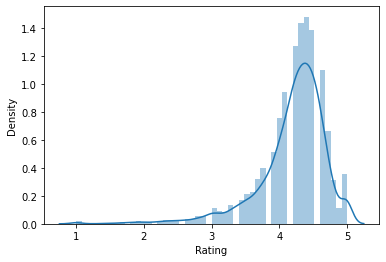

In [37]:
sns.distplot(df['Rating'])
plt.show()

Here the distribution tells that most of the rating is in between 4 to 5 i,e towards higher value.

b. What is the implication of this on your analysis?

If we have a skewed data then it may harm our results. So, in order to use a skewed data we have to apply a log transformation over the whole set of values to discover patterns in the data and make it usable for the statistical model.

# 6. What are the top Content Rating values?
a. Are there any values with very few records?

In [38]:
df['Content Rating'].value_counts()

Everyone           7400
Teen               1082
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Yes, Adults only 18+ --> 3 and Unrated --> 1

b. If yes, drop those as they won’t help in the analysis

In [39]:
Adult_rating = df[df['Content Rating'] == 'Adults only 18+'].index.to_list()
unrated =df[df['Content Rating'] == 'Unrated'].index.to_list()
df.drop(Adult_rating, inplace = True)
df.drop(unrated, inplace = True)
df['Content Rating'].value_counts()

Everyone        7400
Teen            1082
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

# 7. Effect of size on rating

a. Make a joinplot to understand the effect of size on rating

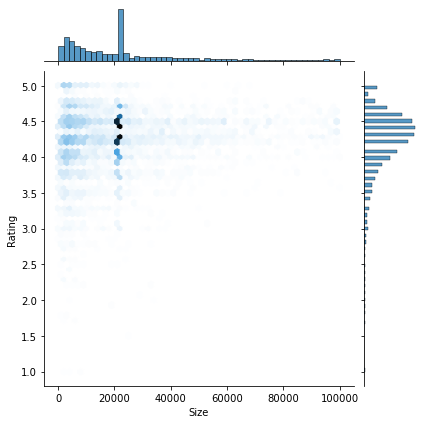

In [40]:
sns.jointplot(x=df['Size'],y=df['Rating'],data=df,kind='hex')
plt.show()

b. Do you see any patterns? 

We observed that the maximum data point gather in between Rating 4.0-4.5 and size 0-40000(40 mb).

c. How do you explain the pattern?

Meaning is that the application size which is in between 0-40000(40 mb) get good rating on play store Effect of price on rating

# 8. Effect of price on rating
a. Make a jointplot (with regression line)

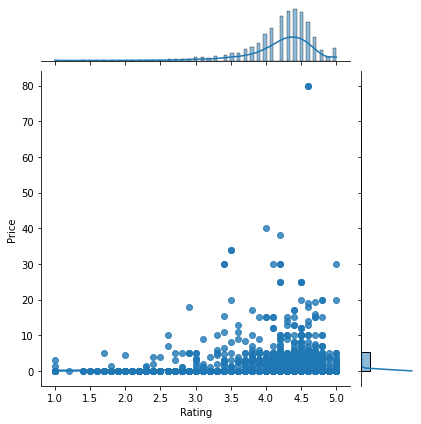

In [41]:
sns.jointplot(x="Rating",y="Price",data=df,kind="reg")
plt.show()

b. What pattern do you see?

The pattern is seen to be flat in nature with more points on the right side of x-axis 

c. How do you explain the pattern?

Increasing the price, Rating Increases

d. Replot the data, this time with only records with price > 0

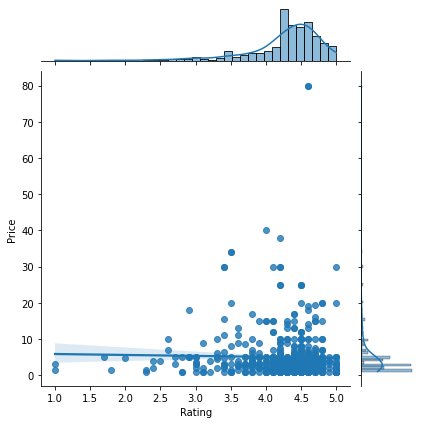

In [42]:
Price_greaterthan_zero = df[df['Price'] > 0]
sns.jointplot(x ="Rating" , y = "Price" ,data = Price_greaterthan_zero, kind = "reg" )
plt.show()

e. Does the pattern change?

Not much

f. What is your overall inference on the effect of price on the rating

With price the rating increases

# 9. Look at all the numeric interactions together –
a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

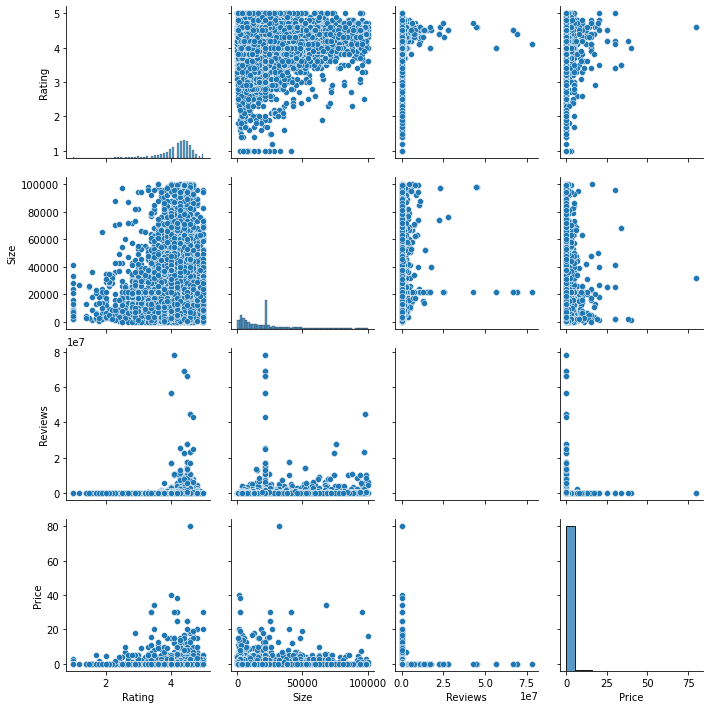

In [43]:
sns.pairplot(df,vars=['Rating','Size', 'Reviews', 'Price'])
plt.show()

# 10. Rating vs. content rating

a. Make a bar plot displaying the rating for each content rating

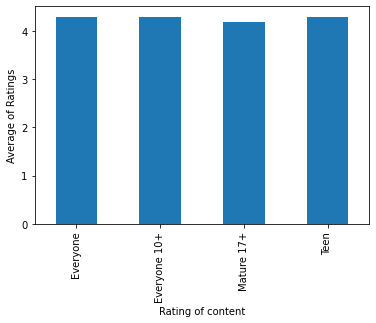

In [44]:
a = df['Rating'].groupby(df['Content Rating']).median().plot(kind = 'bar')
a.set(xlabel ='Rating of content', ylabel = 'Average of Ratings')
plt.show()

b. Which metric would you use? Mean? Median? Some other quantile?

c. Choose the right metric and plot

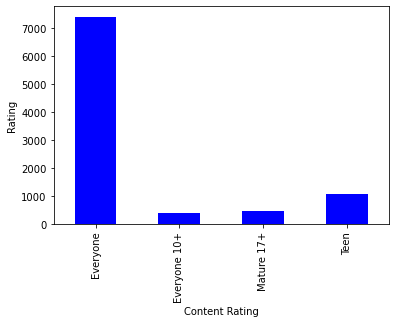

In [45]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color="b")
plt.ylabel('Rating')
plt.show()

# 11. Content rating vs. size vs. rating – 3 variables at a time

a. Create 5 buckets (20% records in each) based on Size

C:\Users\veronica\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


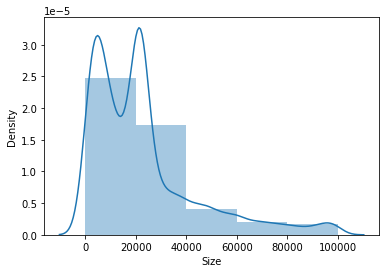

In [46]:
#Checking skewness
sns.distplot(df["Size"], bins=5)
plt.show()

In [47]:
bins=[0, 4600, 12000, 21516, 32000, 100000]
df['Size_Buckets'] = pd.cut(df['Size'], bins, labels=['VERY LOW','LOW','MED','HIGH','VERY HIGH'])
pd.pivot_table(df, values='Rating', index='Size_Buckets', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,4.117206,4.188889,3.951429,4.225773
LOW,4.162179,4.207143,4.129592,4.209655
MED,4.242463,4.262602,4.091975,4.205630
HIGH,4.180133,4.209375,4.168333,4.213158
VERY HIGH,4.208290,4.287805,4.197170,4.279603


b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [48]:
df.Size.quantile([0.2, 0.4,0.6,0.8])

0.2     5100.0
0.4    14000.0
0.6    21516.0
0.8    34000.0
Name: Size, dtype: float64

In [49]:
df.Rating.quantile([0.2, 0.4,0.6,0.8])

0.2    3.9
0.4    4.2
0.6    4.4
0.8    4.6
Name: Rating, dtype: float64

c. Make a heatmap of this

i. Annotated

ii. Greens color map

In [50]:
Size_Buckets =pd.pivot_table(df, values='Rating', index='Size_Buckets', columns='Content Rating', 
                     aggfunc=lambda x:np.quantile(x,0.2))
Size_Buckets

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,3.8,3.84,3.28,3.90
LOW,3.8,3.94,3.64,3.88
MED,4.0,4.10,3.90,3.90
HIGH,3.9,4.00,3.90,4.00
VERY HIGH,3.9,4.10,4.00,4.00


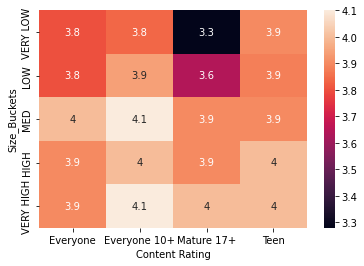

In [51]:
sns.heatmap(Size_Buckets, annot = True)
plt.show()

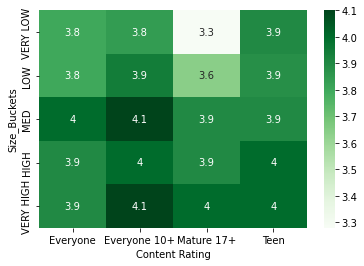

In [52]:
sns.heatmap(Size_Buckets, annot=True, cmap='Greens')
plt.show()

d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

Yes, most of heavier apps seems to be more preferred in all the Content Ratings. But, not to a big variations in it. Except, Mature 17+ where low size apps arent preferred to a greater variation.